In [1]:
import pandas as pd


In [2]:
data = pd.read_excel('/Users/suramya/Documents/Book1.xlsx')

In [3]:
data

,Unnamed: 0,Outlook,Temperature,Humidity,Windy,Play
0,0,sunny,hot,high,False,no
1,1,sunny,hot,high,True,no
2,2,overcast,hot,high,False,yes
3,3,rainy,mild,high,False,yes
4,4,rainy,cool,normal,False,yes
5,5,rainy,cool,normal,True,no
6,6,overcast,cool,normal,True,yes
7,7,sunny,mild,high,False,no
8,8,sunny,cool,normal,False,yes
9,9,rainy,mild,normal,False,yes


In [4]:
df_encoded = pd.get_dummies(data,columns = ['Outlook','Temperature','Humidity','Windy'])

In [5]:
df_encoded

,Unnamed: 0,Play,Outlook_overcast,Outlook_rainy,Outlook_sunny,Temperature_cool,Temperature_hot,Temperature_mild,Humidity_high,Humidity_normal,Windy_False,Windy_True
0,0,no,0,0,1,0,1,0,1,0,1,0
1,1,no,0,0,1,0,1,0,1,0,0,1
2,2,yes,1,0,0,0,1,0,1,0,1,0
3,3,yes,0,1,0,0,0,1,1,0,1,0
4,4,yes,0,1,0,1,0,0,0,1,1,0
5,5,no,0,1,0,1,0,0,0,1,0,1
6,6,yes,1,0,0,1,0,0,0,1,0,1
7,7,no,0,0,1,0,0,1,1,0,1,0
8,8,yes,0,0,1,1,0,0,0,1,1,0
9,9,yes,0,1,0,0,0,1,0,1,1,0


In [6]:
from sklearn.preprocessing import OneHotEncoder

In [7]:
encoder = OneHotEncoder(sparse=False)

# Fit and transform the categorical column
df_rencoded = encoder.fit_transform(data[['Outlook','Temperature','Humidity','Windy']])

# Create a DataFrame from the encoded values
df_rencoded = pd.DataFrame(df_rencoded, columns=encoder.get_feature_names_out(['Outlook','Temperature','Humidity','Windy']))

# Concatenate the encoded DataFrame with the original DataFrame
df_rfinal = pd.concat([data, df_rencoded], axis=1)


In [8]:
df_rencoded

,Outlook_overcast,Outlook_rainy,Outlook_sunny,Temperature_cool,Temperature_hot,Temperature_mild,Humidity_high,Humidity_normal,Windy_False,Windy_True
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
7,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
8,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
9,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [10]:
classifier = DecisionTreeClassifier(criterion='entropy',max_depth= 2)

In [11]:
X = df_encoded.copy().drop(['Play','Unnamed: 0'], axis=1)

In [12]:
X

,Outlook_overcast,Outlook_rainy,Outlook_sunny,Temperature_cool,Temperature_hot,Temperature_mild,Humidity_high,Humidity_normal,Windy_False,Windy_True
0,0,0,1,0,1,0,1,0,1,0
1,0,0,1,0,1,0,1,0,0,1
2,1,0,0,0,1,0,1,0,1,0
3,0,1,0,0,0,1,1,0,1,0
4,0,1,0,1,0,0,0,1,1,0
5,0,1,0,1,0,0,0,1,0,1
6,1,0,0,1,0,0,0,1,0,1
7,0,0,1,0,0,1,1,0,1,0
8,0,0,1,1,0,0,0,1,1,0
9,0,1,0,0,0,1,0,1,1,0


In [13]:
0.33 * 14

4.62

In [14]:
Y = df_encoded[['Play']].copy()

In [15]:
Y

,Play
0,no
1,no
2,yes
3,yes
4,yes
5,no
6,yes
7,no
8,yes
9,yes


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state = 100)

In [17]:
X_train

,Outlook_overcast,Outlook_rainy,Outlook_sunny,Temperature_cool,Temperature_hot,Temperature_mild,Humidity_high,Humidity_normal,Windy_False,Windy_True
4,0,1,0,1,0,0,0,1,1,0
6,1,0,0,1,0,0,0,1,0,1
2,1,0,0,0,1,0,1,0,1,0
0,0,0,1,0,1,0,1,0,1,0
10,0,0,1,0,0,1,0,1,0,1
7,0,0,1,0,0,1,1,0,1,0
3,0,1,0,0,0,1,1,0,1,0
13,0,1,0,0,0,1,1,0,0,1
8,0,0,1,1,0,0,0,1,1,0


In [18]:
Y_train

,Play
4,yes
6,yes
2,yes
0,no
10,yes
7,no
3,yes
13,no
8,yes


In [19]:
Train = pd.concat([X_train, Y_train], axis = 1)

In [20]:
Train

,Outlook_overcast,Outlook_rainy,Outlook_sunny,Temperature_cool,Temperature_hot,Temperature_mild,Humidity_high,Humidity_normal,Windy_False,Windy_True,Play
4,0,1,0,1,0,0,0,1,1,0,yes
6,1,0,0,1,0,0,0,1,0,1,yes
2,1,0,0,0,1,0,1,0,1,0,yes
0,0,0,1,0,1,0,1,0,1,0,no
10,0,0,1,0,0,1,0,1,0,1,yes
7,0,0,1,0,0,1,1,0,1,0,no
3,0,1,0,0,0,1,1,0,1,0,yes
13,0,1,0,0,0,1,1,0,0,1,no
8,0,0,1,1,0,0,0,1,1,0,yes


In [21]:
Test = pd.concat([X_test, Y_test], axis = 1)

In [22]:
Test

,Outlook_overcast,Outlook_rainy,Outlook_sunny,Temperature_cool,Temperature_hot,Temperature_mild,Humidity_high,Humidity_normal,Windy_False,Windy_True,Play
11,1,0,0,0,0,1,1,0,0,1,yes
12,1,0,0,0,1,0,0,1,1,0,yes
5,0,1,0,1,0,0,0,1,0,1,no
1,0,0,1,0,1,0,1,0,0,1,no
9,0,1,0,0,0,1,0,1,1,0,yes


In [23]:
clf = classifier.fit(X_train, Y_train)

In [24]:

prediction = classifier.predict(X_test)

In [25]:
prediction

array(['yes', 'yes', 'yes', 'no', 'yes'], dtype=object)

In [28]:
cm = confusion_matrix( prediction, Y_test)


In [29]:
cm

array([[1, 0],
       [1, 3]])

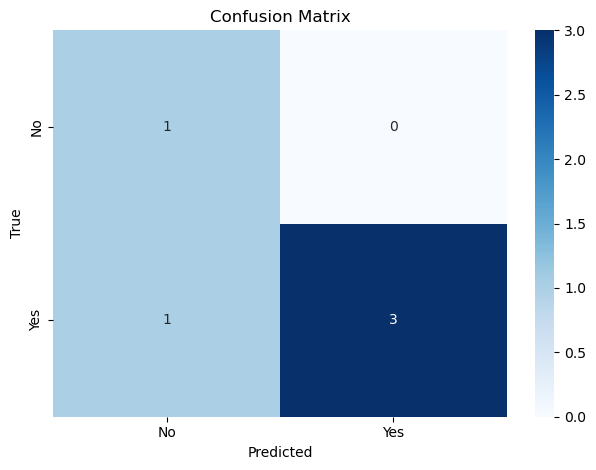

In [40]:
sns.heatmap(cm, annot=True, fmt='', cmap='Blues',xticklabels = ['No','Yes'],yticklabels = ['No','Yes'] )

# Add labels, title, and adjust layout
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()

# Display the heatmap
plt.show()

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
from sklearn.metrics import classification_report


In [34]:
report = classification_report(Y_test, prediction)


In [35]:
print(report)

              precision    recall  f1-score   support

          no       1.00      0.50      0.67         2
         yes       0.75      1.00      0.86         3

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5



In [36]:
from sklearn.tree import DecisionTreeClassifier,plot_tree


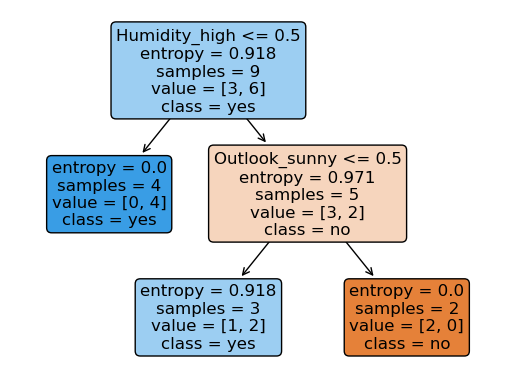

In [37]:

plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True, rounded=True)
plt.show()

In [27]:
from sklearn.metrics import confusion_matrix